In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import re
import os
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub(r'\\','',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

In [3]:
path = "scripts/"
exten = ".txt"
var_names = []

for file in os.listdir(path):
    if file.endswith(exten):
        var_names.append(os.path.splitext(file)[0])
        
for name in var_names:
    print(name)

austinpowers
dumbanddumber
aceventura
clueless
princessbride
montypython
elf
rushhour


In [4]:
for name in var_names:
    globals()[name] = open(path+name+exten).read()

In [5]:
print(austinpowers)

Austin Powers
International Man of
Mystery
By
Mike Myers
                                            
                                                                                      
                                                                                      
                                                                   FINAL DRAFT - 5/24/96
                                                                  PINK REVISION - 5/17/96
                                                                  BLUE REVISION - 7/12/96
                                                                YELLOW REVISION - 7/17/96
                                                                                      
 
 
 
 
1  EXT.  LAS VEGAS (STOCK FOTTAGE) - NIGHT
 
GRAPHIC:  1967 - SOMEWHERE IN NEVADA
 
It is set against the obvious skyline of Las Vegas.
 
2  INT.  DR. EVIL'S PRIVATE QUARTERS - DAY
 
The lair is 1960's high-tech.  We see a huge oversized conference table with six scary-

In [6]:
for name in var_names:
    globals()[name] = text_cleaner(globals()[name])

In [7]:
print(austinpowers)

Austin Powers International Man of Mystery By Mike Myers FINAL DRAFT - 5/24/96 PINK REVISION - 5/17/96 BLUE REVISION - 7/12/96 YELLOW REVISION - 7/17/96 1 EXT. LAS VEGAS (STOCK FOTTAGE) - NIGHT GRAPHIC: 1967 - SOMEWHERE IN NEVADA It is set against the obvious skyline of Las Vegas. 2 INT. DR. EVIL'S PRIVATE QUARTERS - DAY The lair is 1960's high-tech. We see a huge oversized conference table with six scary-looking EVIL ASSOCIATES, including a Latin American REVOLUTIONARY in a field jacket and turtleneck, TWIN NORDIC DOCTORS, and a METER MAID. ANGLE ON: A RING WITH DR. EVIL'S INSIGNIA ON IT. The ringed hand is stroking a WHITE FLUFFY CAT. DR. EVIL (face always unseen) Gentlemen, are we all here? Good. As you know, my plot to high-jack nuclear weapons and hold the world hostage has failed. Again. This organization will not tolerate failure. He presses a button. The Revolutionary, the twin Nordic doctors, and the meter maid's chairs tip back and fall into a pit. Their chairs return empty a

In [8]:
nlp = spacy.load('en')

for name in var_names:
    globals()[name+"_doc"] = nlp(globals()[name])

In [9]:
print(austinpowers_doc)

Austin Powers International Man of Mystery By Mike Myers FINAL DRAFT - 5/24/96 PINK REVISION - 5/17/96 BLUE REVISION - 7/12/96 YELLOW REVISION - 7/17/96 1 EXT. LAS VEGAS (STOCK FOTTAGE) - NIGHT GRAPHIC: 1967 - SOMEWHERE IN NEVADA It is set against the obvious skyline of Las Vegas. 2 INT. DR. EVIL'S PRIVATE QUARTERS - DAY The lair is 1960's high-tech. We see a huge oversized conference table with six scary-looking EVIL ASSOCIATES, including a Latin American REVOLUTIONARY in a field jacket and turtleneck, TWIN NORDIC DOCTORS, and a METER MAID. ANGLE ON: A RING WITH DR. EVIL'S INSIGNIA ON IT. The ringed hand is stroking a WHITE FLUFFY CAT. DR. EVIL (face always unseen) Gentlemen, are we all here? Good. As you know, my plot to high-jack nuclear weapons and hold the world hostage has failed. Again. This organization will not tolerate failure. He presses a button. The Revolutionary, the twin Nordic doctors, and the meter maid's chairs tip back and fall into a pit. Their chairs return empty a

In [10]:
for name in var_names:
    globals()[name+"_sents"] = [[sent, name] for sent in globals()[name+"_doc"].sents]

In [11]:
print(austinpowers_sents)

[[Austin Powers International Man of Mystery, 'austinpowers'], [By Mike Myers FINAL DRAFT - 5/24/96 PINK REVISION - 5/17/96 BLUE REVISION - 7/12/96 YELLOW REVISION - 7/17/96 1 EXT., 'austinpowers'], [LAS VEGAS (STOCK FOTTAGE) - NIGHT GRAPHIC:, 'austinpowers'], [1967 - SOMEWHERE IN NEVADA, 'austinpowers'], [It is set against the obvious skyline of Las Vegas., 'austinpowers'], [2 INT., 'austinpowers'], [DR., 'austinpowers'], [EVIL'S, 'austinpowers'], [PRIVATE QUARTERS - DAY, 'austinpowers'], [The lair is 1960's high-tech., 'austinpowers'], [We see a huge oversized conference table with six scary-looking EVIL ASSOCIATES, including a Latin American REVOLUTIONARY in a field jacket and turtleneck, TWIN NORDIC DOCTORS, and a METER MAID., 'austinpowers'], [ANGLE ON:, 'austinpowers'], [A RING WITH DR., 'austinpowers'], [EVIL'S, 'austinpowers'], [INSIGNIA ON IT., 'austinpowers'], [The ringed hand is stroking a WHITE FLUFFY CAT., 'austinpowers'], [DR., 'austinpowers'], [EVIL (face always unseen),

In [12]:
combstr = ''
for num, name in enumerate(var_names):
    if num == len(var_names)-1:
        combstr += name + "_sents"
    else:
        combstr += name + "_sents" + " + "
print(combstr)

austinpowers_sents + dumbanddumber_sents + aceventura_sents + clueless_sents + princessbride_sents + montypython_sents + elf_sents + rushhour_sents


In [13]:
df = pd.DataFrame(eval(combstr))
df.head()

0             1
0  (Austin, Powers, International, Man, of, Mystery)  austinpowers
1  (By, Mike, Myers, FINAL, DRAFT, -, 5/24/96, PI...  austinpowers
2  (LAS, VEGAS, (, STOCK, FOTTAGE, ), -, NIGHT, G...  austinpowers
3                   (1967, -, SOMEWHERE, IN, NEVADA)  austinpowers
4  (It, is, set, against, the, obvious, skyline, ...  austinpowers

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25701 entries, 0 to 25700
Data columns (total 2 columns):
0    25701 non-null object
1    25701 non-null object
dtypes: object(2)
memory usage: 401.7+ KB


In [15]:
df.columns = ['sentences', 'movie']

In [16]:
df.sentences = df.sentences.astype('str') 
df.movie = df.movie.astype('str')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25701 entries, 0 to 25700
Data columns (total 2 columns):
sentences    25701 non-null object
movie        25701 non-null object
dtypes: object(2)
memory usage: 401.7+ KB


In [18]:
rem_str = "(),"

for s in rem_str:
    df.sentences = df.sentences.replace(s, '')

In [19]:
df.head()

sentences         movie
0         Austin Powers International Man of Mystery  austinpowers
1  By Mike Myers FINAL DRAFT - 5/24/96 PINK REVIS...  austinpowers
2         LAS VEGAS (STOCK FOTTAGE) - NIGHT GRAPHIC:  austinpowers
3                         1967 - SOMEWHERE IN NEVADA  austinpowers
4  It is set against the obvious skyline of Las V...  austinpowers

In [20]:
df_size = df.groupby('movie').size().reset_index()
df_size.columns = ['Movie', 'Size']
min_sent = df_size['Size'].min()
print(df_size)
print("\nMin Sentences: ", min_sent)

           Movie  Size
0     aceventura  2950
1   austinpowers  3223
2       clueless  2527
3  dumbanddumber  3657
4            elf  3275
5    montypython  3358
6  princessbride  3154
7       rushhour  3557

Min Sentences:  2527


In [21]:
stopset = set(stopwords.words('english'))
tvec = TfidfVectorizer(use_idf=True,
                       strip_accents='ascii',
                       stop_words=stopset,
                       lowercase=True,
                       norm=u'l2',
                       ngram_range=(1,2))

In [22]:
Y = df.movie
X = tvec.fit_transform(df.sentences)

In [23]:
print(Y.shape)
print(X.shape)

(25701,)
(25701, 67250)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15)

In [25]:
nbm = naive_bayes.MultinomialNB(alpha=.35)
train = nbm.fit(X_train, Y_train)
print('Multinomial Naive Bayes')
print('Training set score:', nbm.score(X_train, Y_train))
print('Test set score:', nbm.score(X_test, Y_test))

Multinomial Naive Bayes
Training set score: 0.9044174868390936
Test set score: 0.70798755186722


In [26]:
lr = LogisticRegression()
train = lr.fit(X_train, Y_train)
print('Multinomial Naive Bayes')
print('Training set score:', lr.score(X_train, Y_train))
print('Test set score:', lr.score(X_test, Y_test))

Multinomial Naive Bayes
Training set score: 0.8855573357747768
Test set score: 0.7028008298755186


In [27]:
cvec = CountVectorizer(strip_accents='ascii',
                       stop_words=stopset,
                       lowercase=True,
                       input='content',
                       binary=False,
                       ngram_range=(1,2))

In [28]:
Y2 = df.movie
X2 = cvec.fit_transform(df.sentences)

In [29]:
print(Y2.shape)
print(X2.shape)

(25701,)
(25701, 67250)


In [30]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=.15)

In [31]:
nbm2 = naive_bayes.MultinomialNB(alpha=.35)
train2 = nbm2.fit(X_train2, Y_train2)
print('Multinomial Naive Bayes')
print('Training set score:', nbm2.score(X_train2, Y_train2))
print('Test set score:', nbm2.score(X_test2, Y_test2))

Multinomial Naive Bayes
Training set score: 0.8845044632639047
Test set score: 0.7028008298755186


In [32]:
lr2 = LogisticRegression()
train2 = lr2.fit(X_train2, Y_train2)
print('Multinomial Naive Bayes')
print('Training set score:', lr2.score(X_train2, Y_train2))
print('Test set score:', lr2.score(X_test2, Y_test2))

Multinomial Naive Bayes
Training set score: 0.9084458686198215
Test set score: 0.6859439834024896


In [33]:
phrase1 = "Yo mama so fat she has more chins than a Chinese phone book."
phrase2 = "Fancy a shag darling? No? would you mind lying down while I have one then?"
phrase3 = "Behind every great man is a woman rolling her eyes."
phrase4 = "Hey, maybe I'll give you a call sometime. Your number still 911? Alrighty then."
phrase5 = "Dying is one of the few things that can be done as easily lying down."
phrase6 = "I am not afraid of death, I just don't want to be there when it happens."
phrase7 = "Did you hear about the kidnapping at school? Everything’s fine. He woke up"
phrase8 = "What’s the difference between snowmen and snowwomen? Snowballs."
phrase9 = "Like, oh my god!"
phrase10 = "What kind of bagel can fly? A plain bagel."

In [34]:
rem_str = "'[]"
final_pred = []
num_votes = []
list_of_votes = []
phrases = []

for n in range(1, 11):
    phrases.append(globals()['phrase'+str(n)])
    test_review_array = np.array([globals()['phrase'+str(n)]])
    test_review_vector = tvec.transform(test_review_array)
    test_review_vector2 = cvec.transform(test_review_array)
    
    pred_list = [str(nbm.predict(test_review_vector)),
                 str(lr.predict(test_review_vector)),
                 str(nbm2.predict(test_review_vector2)),
                 str(lr2.predict(test_review_vector2))]


    for s in rem_str:
        pred_list = [vote.replace(s,'') for vote in pred_list]
    list_of_votes.append(pred_list)
    most_common, num_most_common = Counter(pred_list).most_common(1)[0]
    final_pred.append(most_common) 
    num_votes.append(num_most_common)

### Quote #1:
# "Yo mama so fat she has more chins than a Chinese phone book."<br/>

In [35]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[0], num_votes[0]))
print('\nVote Breakdown:\n', list_of_votes[0])


Prediction: rushhour with a number of 3 votes

Vote Breakdown:
 ['rushhour', 'rushhour', 'clueless', 'rushhour']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #2:
# "Fancy a shag darling? No? would you mind lying down while I have one then?"<br/>

In [36]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[1], num_votes[1]))
print('\nVote Breakdown:\n', list_of_votes[1])


Prediction: austinpowers with a number of 3 votes

Vote Breakdown:
 ['austinpowers', 'austinpowers', 'austinpowers', 'aceventura']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #3:
# "Behind every great man is a woman rolling her eyes."<br/>

In [37]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[2], num_votes[2]))
print('\nVote Breakdown:\n', list_of_votes[2])


Prediction: princessbride with a number of 4 votes

Vote Breakdown:
 ['princessbride', 'princessbride', 'princessbride', 'princessbride']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #4:
# "Hey, maybe I'll give you a call sometime. Your number still 911? Alrighty then."<br/>

In [38]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[3], num_votes[3]))
print('\nVote Breakdown:\n', list_of_votes[3])


Prediction: aceventura with a number of 4 votes

Vote Breakdown:
 ['aceventura', 'aceventura', 'aceventura', 'aceventura']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #5:
# "Dying is one of the few things that can be done as easily lying down."<br/>

In [39]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[4], num_votes[4]))
print('\nVote Breakdown:\n', list_of_votes[4])


Prediction: montypython with a number of 2 votes

Vote Breakdown:
 ['montypython', 'austinpowers', 'princessbride', 'montypython']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #6:
# "I am not afraid of death, I just don't want to be there when it happens."<br/>

In [40]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[5], num_votes[5]))
print('\nVote Breakdown:\n', list_of_votes[5])


Prediction: princessbride with a number of 3 votes

Vote Breakdown:
 ['princessbride', 'princessbride', 'montypython', 'princessbride']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #7:
# "Did you hear about the kidnapping at school? Everything’s fine. He woke up"<br/>

In [41]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[6], num_votes[6]))
print('\nVote Breakdown:\n', list_of_votes[6])


Prediction: clueless with a number of 4 votes

Vote Breakdown:
 ['clueless', 'clueless', 'clueless', 'clueless']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #8:
# "What’s the difference between snowmen and snowwomen? Snowballs."<br/>

In [42]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[7], num_votes[7]))
print('\nVote Breakdown:\n', list_of_votes[7])


Prediction: elf with a number of 3 votes

Vote Breakdown:
 ['elf', 'elf', 'elf', 'princessbride']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #9:
# "Like, oh my god!"<br/>

In [43]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[8], num_votes[8]))
print('\nVote Breakdown:\n', list_of_votes[8])


Prediction: clueless with a number of 4 votes

Vote Breakdown:
 ['clueless', 'clueless', 'clueless', 'clueless']


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
### Quote #10:
# "What kind of bagel can fly? A plain bagel."<br/>

In [44]:
print('\nPrediction: {} with a number of {} votes'.format(final_pred[9], num_votes[9]))
print('\nVote Breakdown:\n', list_of_votes[9], '\n')


Prediction: dumbanddumber with a number of 3 votes

Vote Breakdown:
 ['dumbanddumber', 'elf', 'dumbanddumber', 'dumbanddumber'] 



<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
# Summary:

In [45]:
pd.set_option('display.max_colwidth', -1)

vote_summary = pd.DataFrame()
vote_summary['Phrase'] = phrases
vote_summary['Prediction'] = final_pred
vote_summary['# of Votes'] = num_votes
vote_summary['detail'] = list_of_votes

vote_summary

Phrase  \
0  Yo mama so fat she has more chins than a Chinese phone book.                      
1  Fancy a shag darling? No? would you mind lying down while I have one then?        
2  Behind every great man is a woman rolling her eyes.                               
3  Hey, maybe I'll give you a call sometime. Your number still 911? Alrighty then.   
4  Dying is one of the few things that can be done as easily lying down.             
5  I am not afraid of death, I just don't want to be there when it happens.          
6  Did you hear about the kidnapping at school? Everything’s fine. He woke up        
7  What’s the difference between snowmen and snowwomen? Snowballs.                   
8  Like, oh my god!                                                                  
9  What kind of bagel can fly? A plain bagel.                                        

      Prediction  # of Votes  \
0  rushhour       3            
1  austinpowers   3            
2  princessbride  4            
3  aceventura     4            
4  montypython    2            
5  princessbride  3            
6  clueless       4            
7  elf            3            
8  clueless       4            
9  dumbanddumber  3            

                                                         detail  
0  [rushhour, rushhour, clueless, rushhour]                      
1  [austinpowers, austinpowers, austinpowers, aceventura]        
2  [princessbride, princessbride, princessbride, princessbride]  
3  [aceventura, aceventura, aceventura, aceventura]              
4  [montypython, austinpowers, princessbride, montypython]       
5  [princessbride, princessbride, montypython, princessbride]    
6  [clueless, clueless, clueless, clueless]                      
7  [elf, elf, elf, princessbride]                                
8  [clueless, clueless, clueless, clueless]                      
9  [dumbanddumber, elf, dumbanddumber, dumbanddumber]

# Please enter custom quote or joke:

In [46]:
test_review_array = np.array(['what the world needs now is love sweet love'])

In [47]:
test_review_vector = tvec.transform(test_review_array)
test_review_vector2 = cvec.transform(test_review_array)
    
pred_list = [str(nbm.predict(test_review_vector)),
             str(lr.predict(test_review_vector)),
             str(nbm2.predict(test_review_vector2)),
             str(lr2.predict(test_review_vector2))]

for s in rem_str:
    pred_list = [vote.replace(s,'') for vote in pred_list]

most_common, num_most_common = Counter(pred_list).most_common(1)[0]

print('\nPrediction: {} with a number of {} votes'.format(most_common, num_most_common))
print('\nVote Breakdown:\n', pred_list, '\n')


Prediction: austinpowers with a number of 4 votes

Vote Breakdown:
 ['austinpowers', 'austinpowers', 'austinpowers', 'austinpowers'] 



# What are the most common words?



Movie:  austinpowers


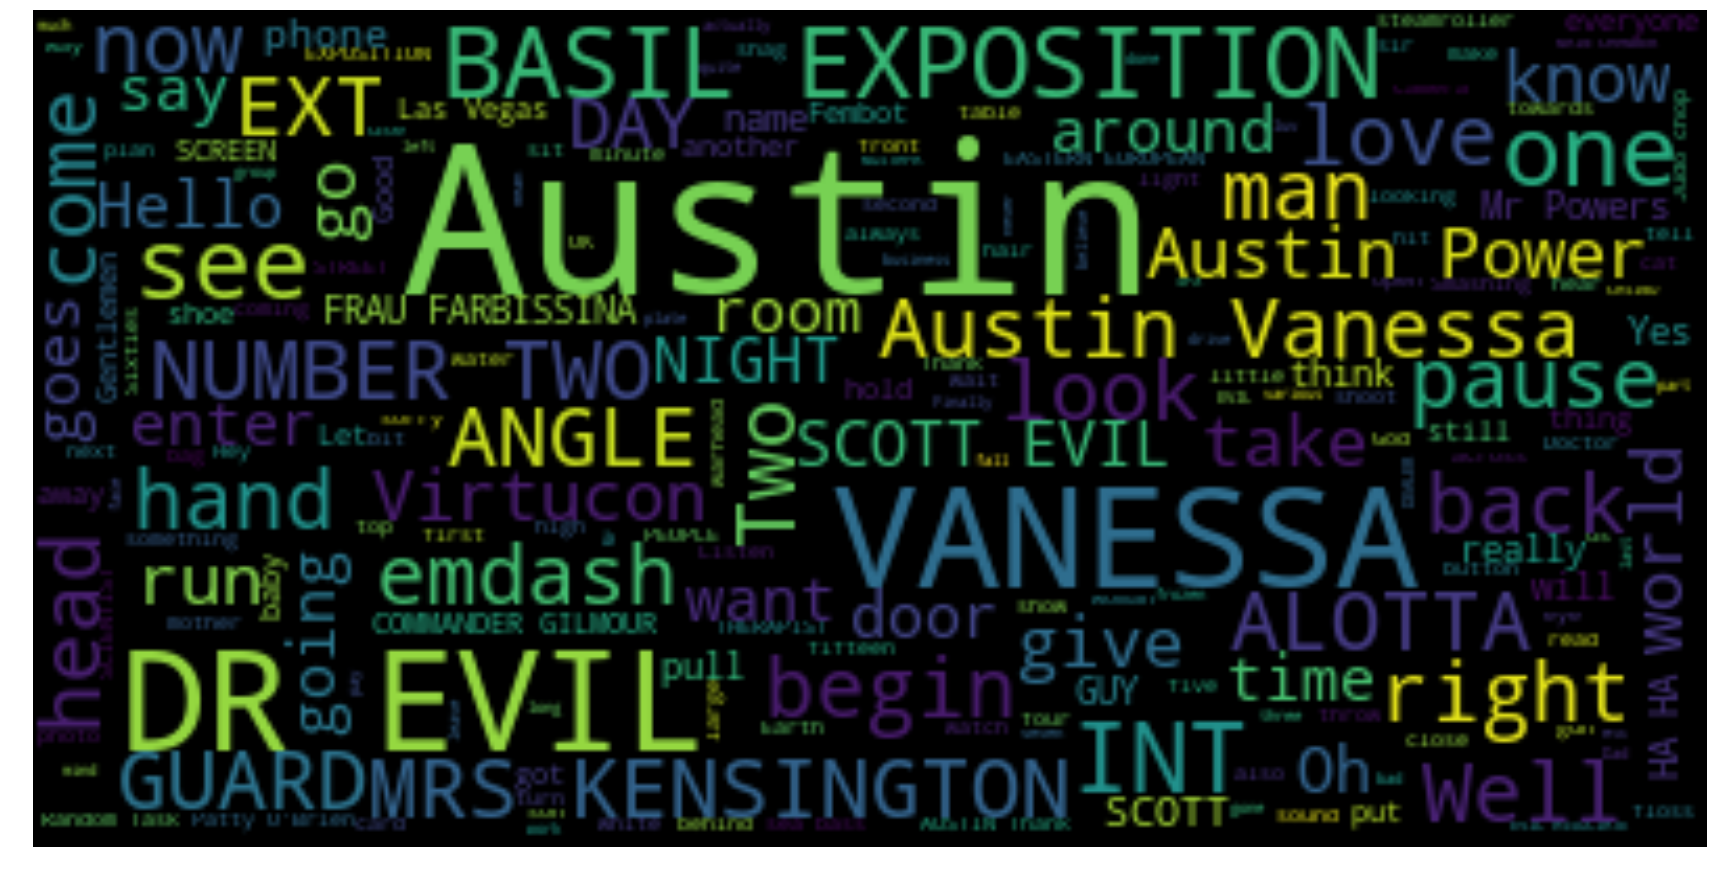



Movie:  dumbanddumber


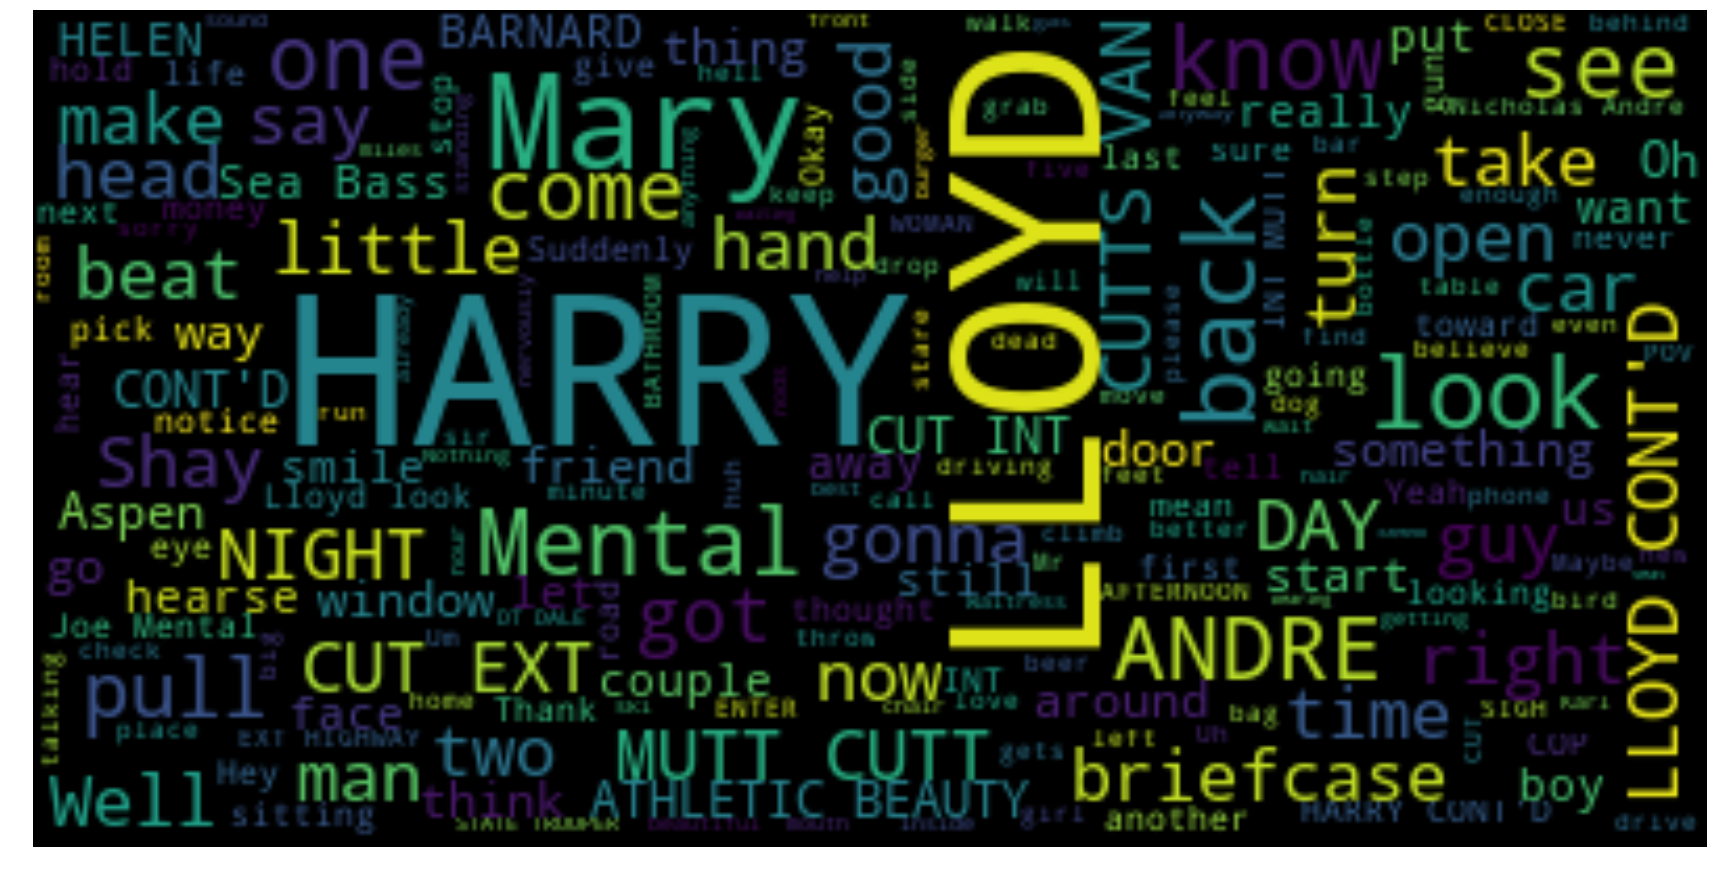



Movie:  aceventura


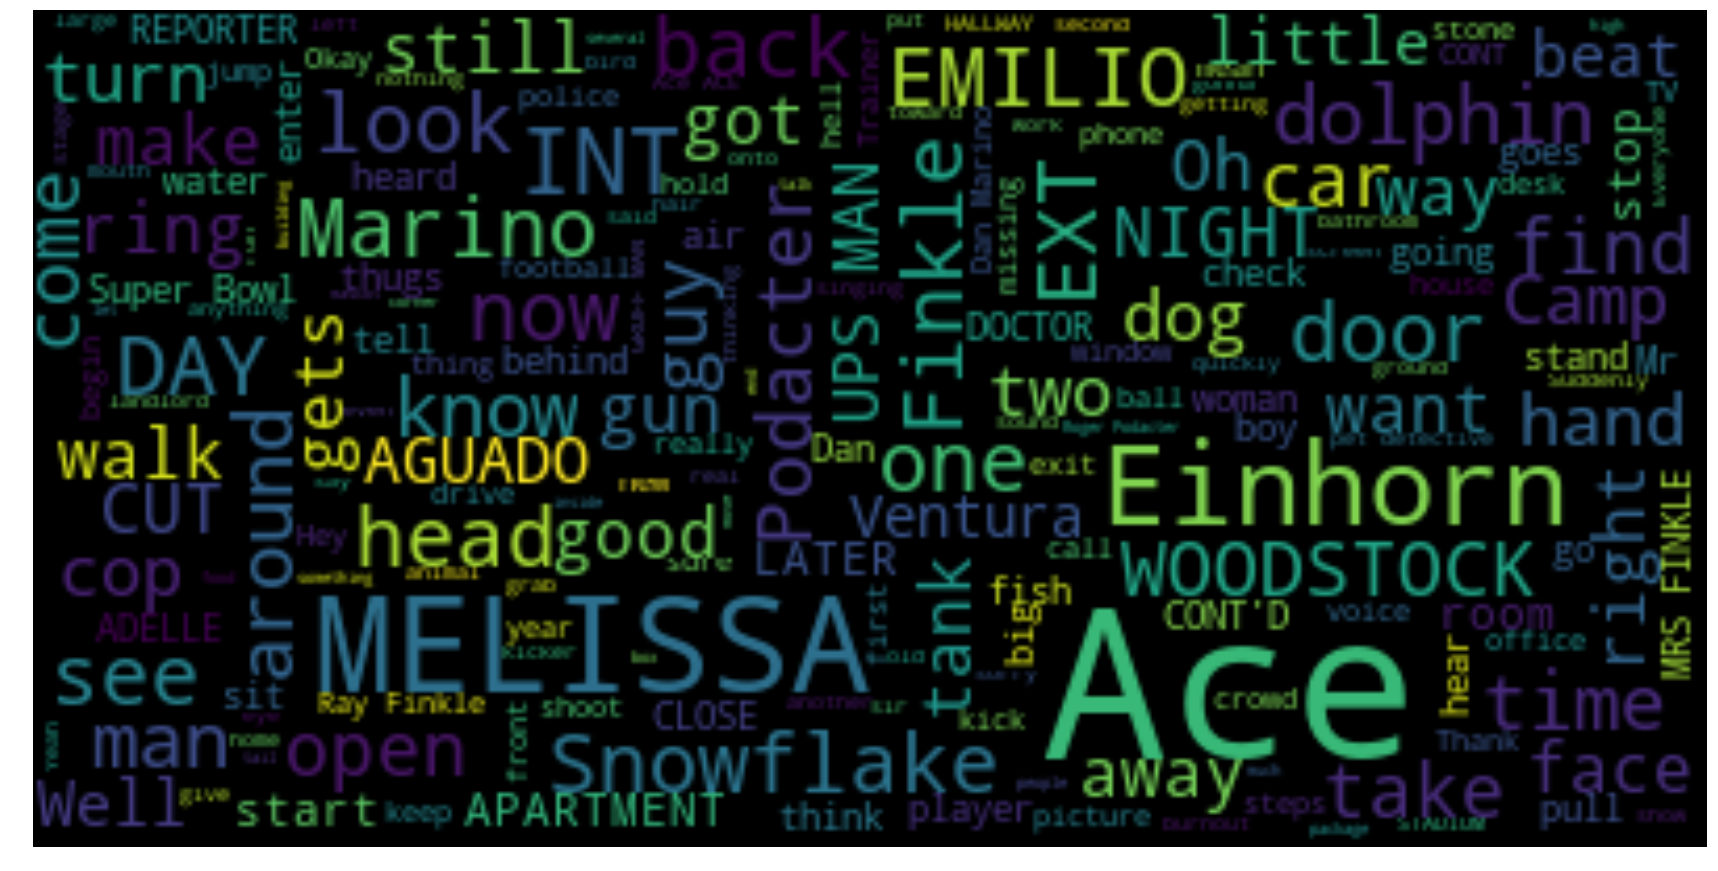



Movie:  clueless


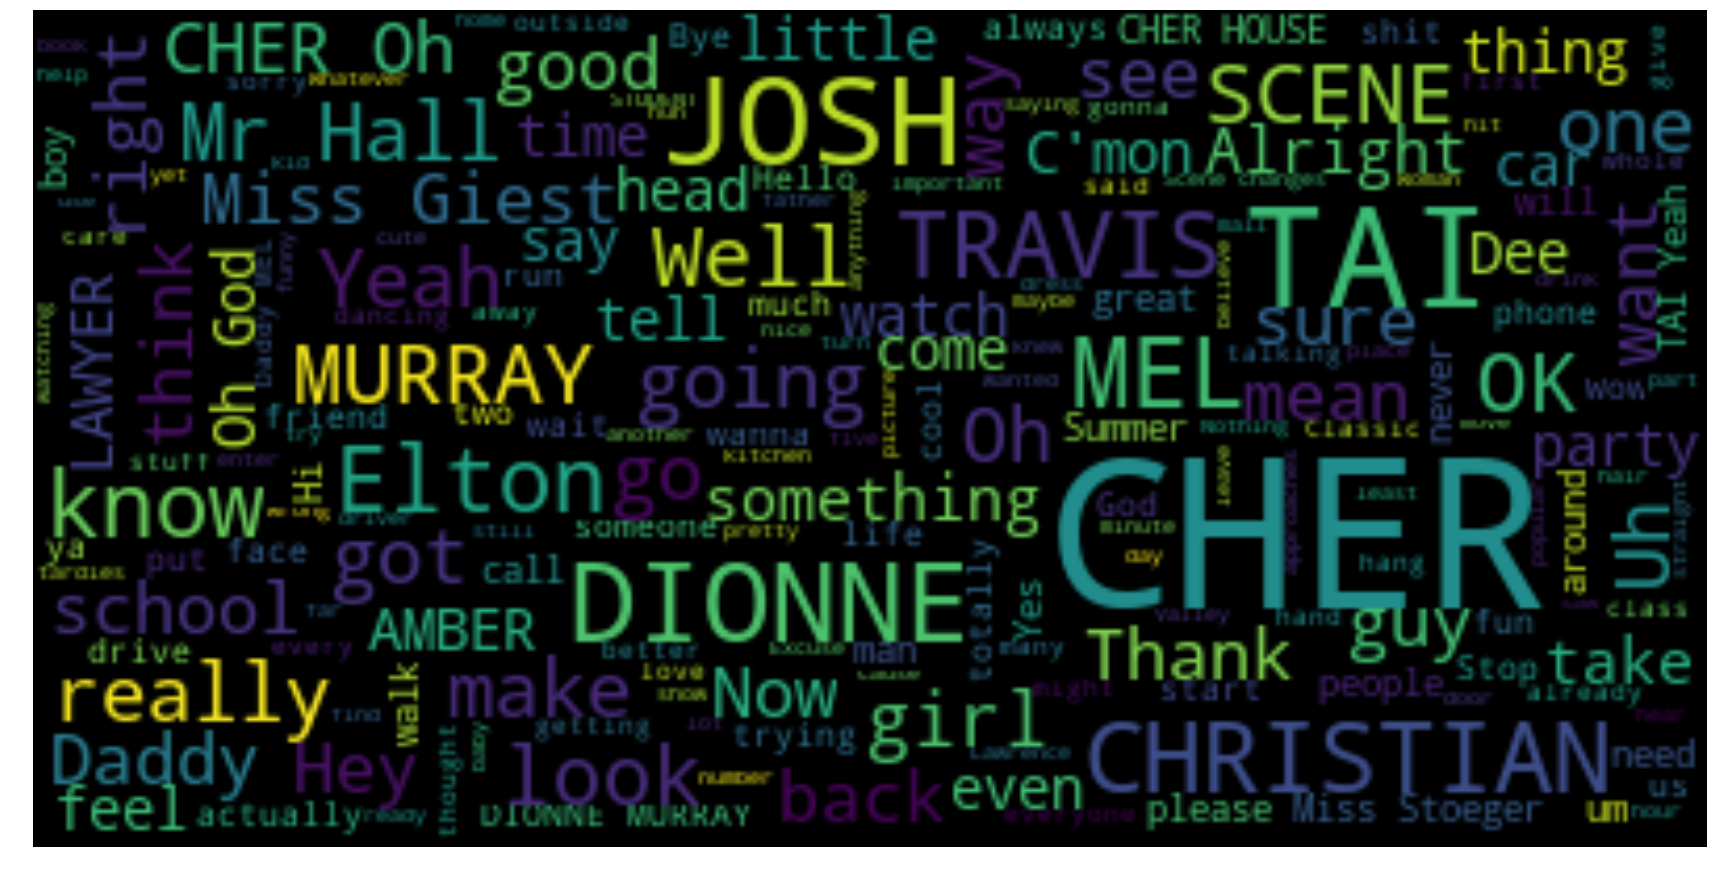



Movie:  princessbride


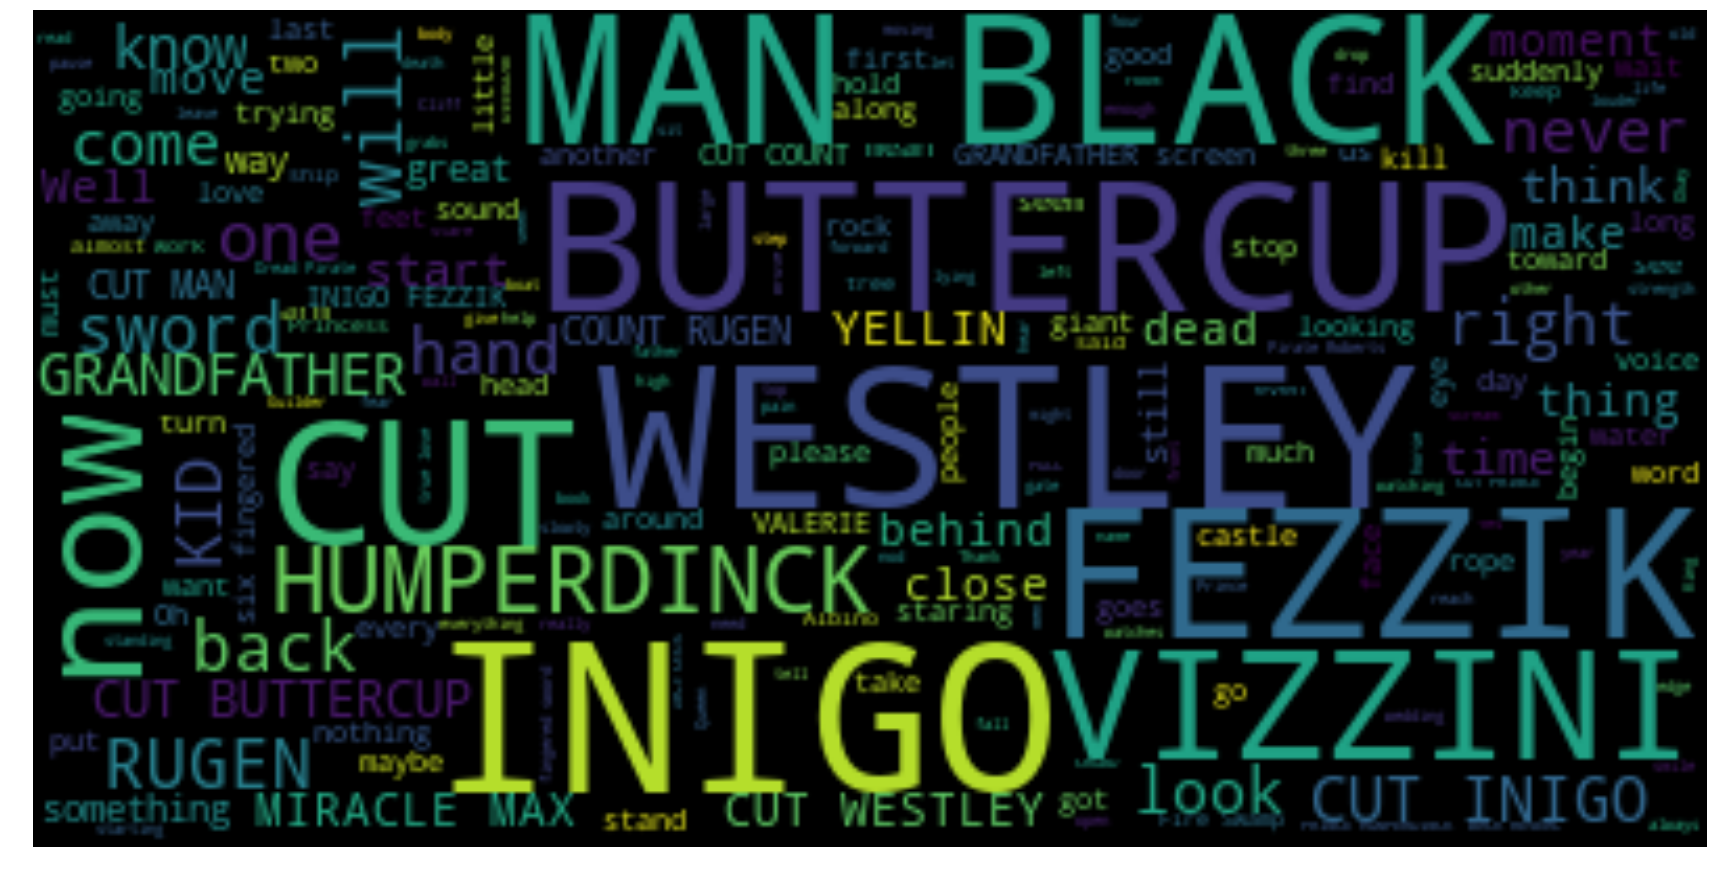



Movie:  montypython


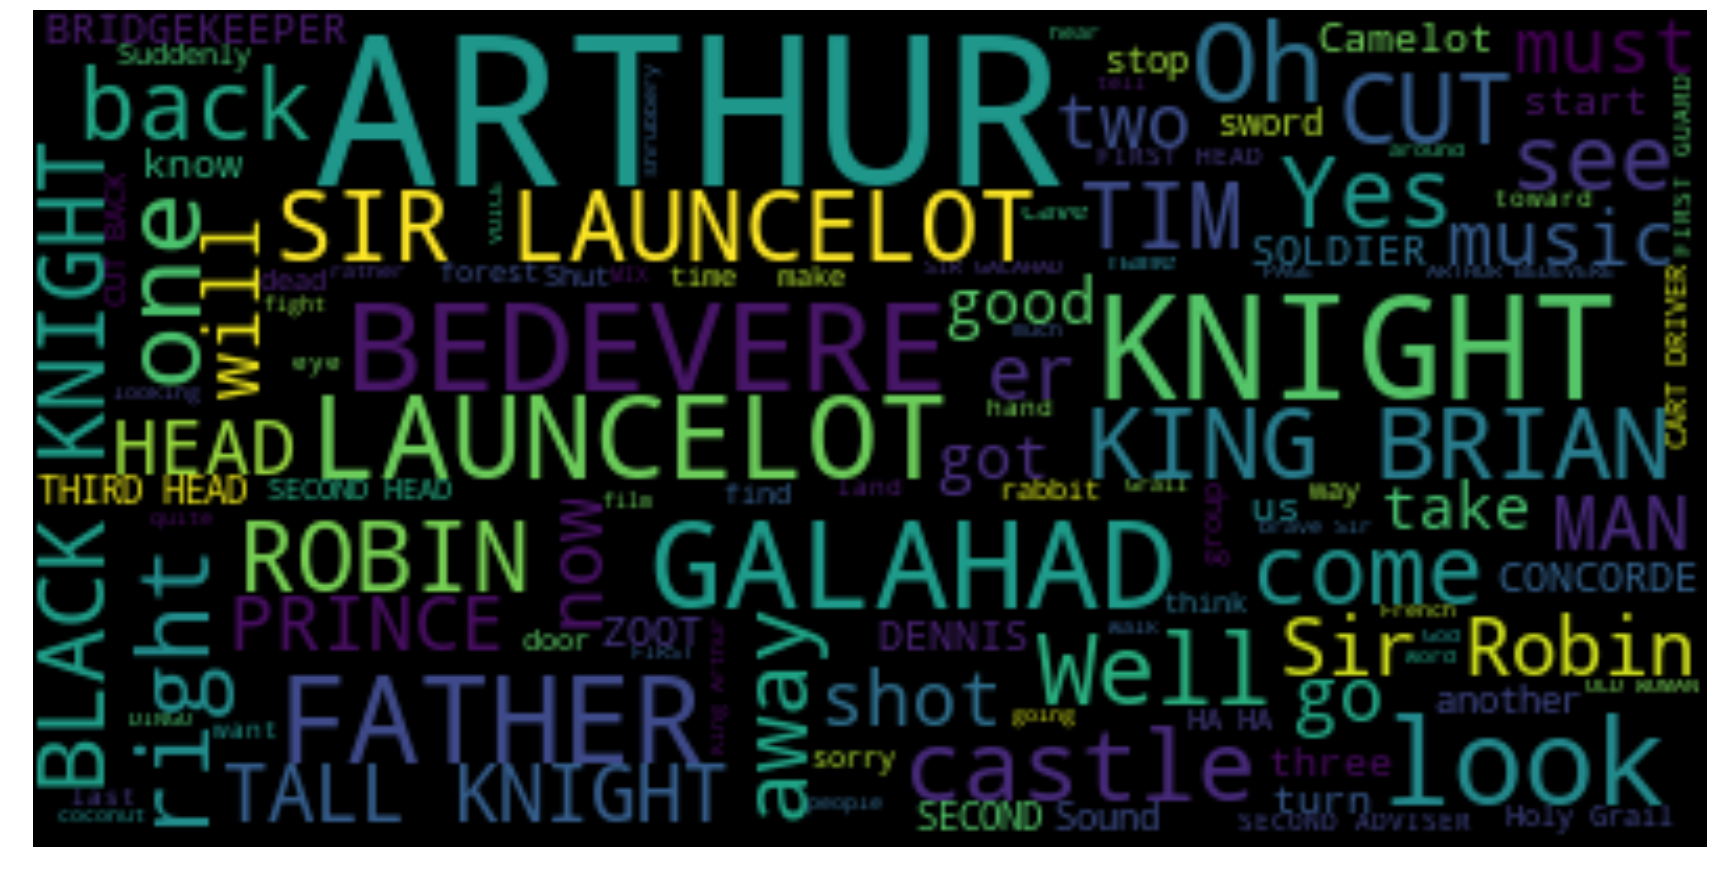



Movie:  elf


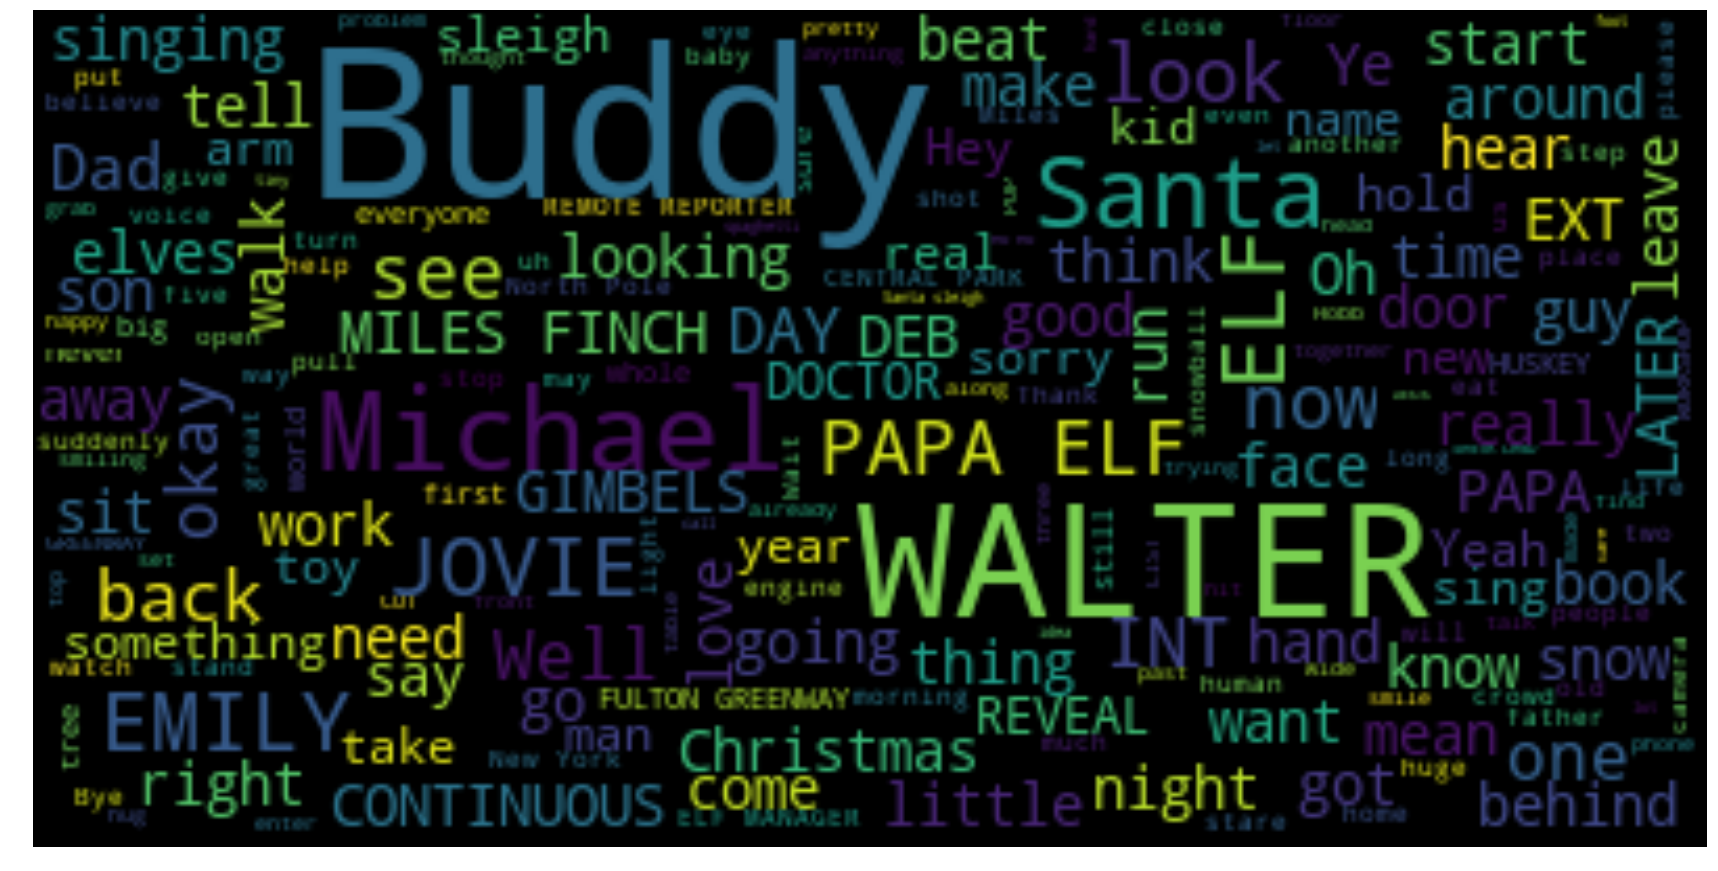



Movie:  rushhour


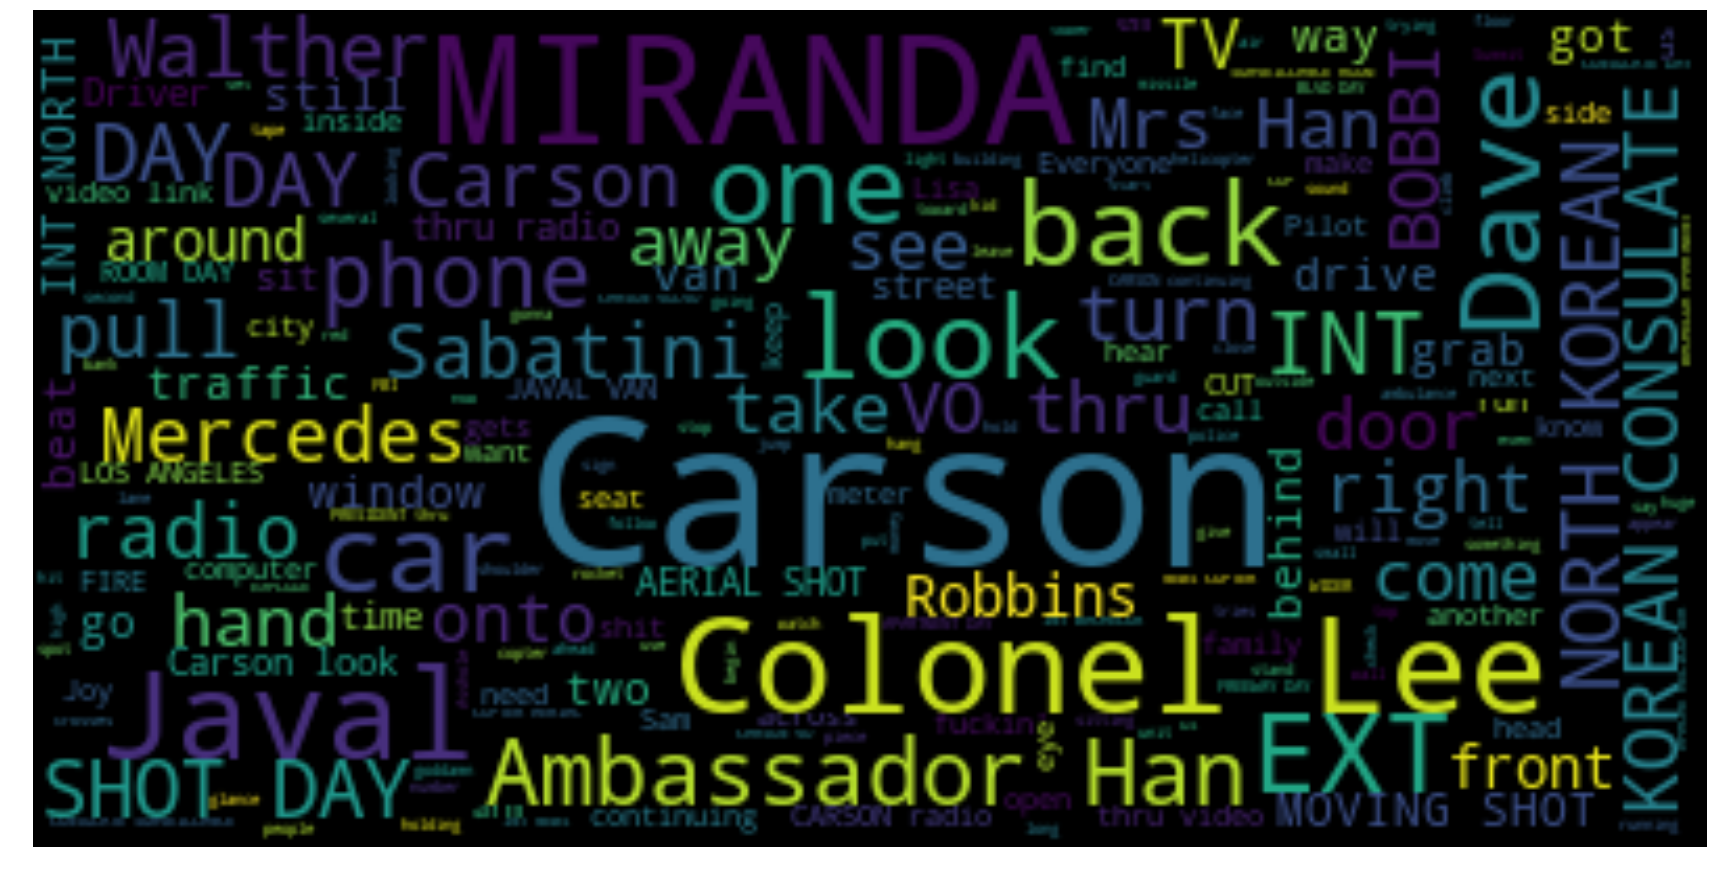

In [48]:
for name in var_names:
    print('\n\nMovie: ', name)
    wordcloud = WordCloud(max_font_size=50).generate(' '.join(df[df['movie'] == name].sentences))
    plt.figure(figsize=(30, 30))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [49]:
for name in var_names:
    globals()[name+'_sentences'] = []
    
    for sentence in globals()[name+'_doc'].sents:
        sentence = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
        globals()[name+'_sentences'].append(sentence)

    print('\nMovie: ', name)
#    print(globals()[name+'_sentences'][10])
    print('We have {} sentences and {} tokens.'.format(len(globals()[name+'_sentences']), len(globals()[name])))


Movie:  austinpowers
We have 3223 sentences and 111374 tokens.

Movie:  dumbanddumber
We have 3657 sentences and 126180 tokens.

Movie:  aceventura
We have 2950 sentences and 100479 tokens.

Movie:  clueless
We have 2527 sentences and 70221 tokens.

Movie:  princessbride
We have 3154 sentences and 120207 tokens.

Movie:  montypython
We have 3358 sentences and 125609 tokens.

Movie:  elf
We have 3275 sentences and 105848 tokens.

Movie:  rushhour
We have 3557 sentences and 158274 tokens.


In [50]:
X_train, X_test = train_test_split(df.sentences, test_size=0.4, random_state=0)

X_tfidf = tvec.fit_transform(df.sentences)
print("Number of features: %d" % X_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf = train_test_split(X_tfidf, test_size=0.4, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]

#List of features
terms = tvec.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 67250
Original sentence: 2 INT.
Tf_idf vector: {'contribution giving': 0.3792574422653689, 'heard contribution': 0.3792574422653689, 'never heard': 0.3792574422653689, 'case never': 0.3792574422653689, 'contribution': 0.36455779028769875, 'heard': 0.2655838540071639, 'case': 0.2798915691668098, 'giving': 0.2976395538751544, 'never': 0.23300087865695565}


In [51]:
#Our SVD data reducer.  We are going to reduce the feature space from 67,250 to 800.
svd= TruncatedSVD(50)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 16.5151759323833
Component 0:
sentences
120 INT.                                                    0.997427
104 INT.                                                    0.997421
THRASH MUSIC ENDS INT.                                      0.997256
THRASH MUSIC STARTS INT.                                    0.997248
47 INT.                                                     0.997238
Soon they're in each other's arms, holding tight... INT.    0.997226
86 INT.                                                     0.997210
31 INT.                                                     0.997191
50 INT.                                                     0.997181
INT.                                                        0.997181
Name: 0, dtype: float64
Component 1:
sentences
Unknown song and artist" CHER V.O.    0.999797
CHER Girlfriend!                      0.999794
CHER A dress.                         0.999776
IX - SCHOOL CHER V.O.                

In [52]:
from gensim.sklearn_api import D2VTransformer
from gensim.models import doc2vec

In [53]:
all_text = df['sentences'].tolist()
all_text = [phr.split() for phr in all_text]

In [54]:
d2v_sentences = [doc2vec.TaggedDocument(words, [i]) for i, words in enumerate(all_text)]

In [55]:
model = D2VTransformer()
model.fit(d2v_sentences)

D2VTransformer(alpha=0.025, batch_words=10000, cbow_mean=1, comment=None,
        dbow_words=0, dm=1, dm_concat=0, dm_mean=None, dm_tag_count=1,
        docvecs=None, docvecs_mapfile=None,
        hashfxn=<built-in function hash>, hs=0, iter=5,
        max_vocab_size=None, min_alpha=0.0001, min_count=5, negative=5,
        sample=0.001, seed=1, size=100, sorted_vocab=1, trim_rule=None,
        window=5, workers=3)

In [56]:
class_dict = {}

for num, name in enumerate(var_names):
    case = {name: num}
    class_dict.update(case)
    
print(class_dict)

{'austinpowers': 0, 'dumbanddumber': 1, 'aceventura': 2, 'clueless': 3, 'princessbride': 4, 'montypython': 5, 'elf': 6, 'rushhour': 7}


In [57]:
for name in var_names:
    globals()[name+"_sents_t"] = [(sent.string.strip().split(), name) for sent in globals()[name+"_doc"].sents]

In [58]:
combstr1 = ''
for num, name in enumerate(var_names):
    if num == len(var_names)-1:
        combstr1 += name + "_sents_t"
    else:
        combstr1 += name + "_sents_t" + " + "
print(combstr1)

train_data = eval(combstr1)

austinpowers_sents_t + dumbanddumber_sents_t + aceventura_sents_t + clueless_sents_t + princessbride_sents_t + montypython_sents_t + elf_sents_t + rushhour_sents_t


In [59]:
train_input = list(map(lambda x: x[0], train_data))
train_target = list(map(lambda x: class_dict[x[1]], train_data))

In [60]:
lr3 = LogisticRegression()
lr3.fit(model.transform(train_input), train_target)
score = lr3.score(model.transform(train_input), train_target)

print(score)

0.21396054628224584


In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(model.transform(train_input), train_target)
score = rfc.score(model.transform(train_input), train_target)

print(score)

0.3267966226995059


In [62]:
from gensim.sklearn_api import Text2BowTransformer
from sklearn.pipeline import Pipeline
from gensim.sklearn_api import LdaTransformer

In [63]:
text2bow_model = Text2BowTransformer()
lda_model = LdaTransformer(num_topics=2, passes=10, minimum_probability=0, random_state=np.random.seed(0))
text_t2b = Pipeline([('bow_model', text2bow_model), ('ldamodel', lda_model), ('classifier', rfc)])
text_t2b.fit(df.sentences, df.movie)
score = text_t2b.score(df.sentences, df.movie)

print(score)

0.7942103420100385
